In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn import metrics

In [ ]:
apple_data = yf.download('AAPL', start='2021-01-01', end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844353,132079200


In [ ]:
!pip install yfinance ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=ffde753fd4cd148c2af8f07c3834c1faf8620497536cc3dd2a5b8cd6454010c2
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
from ta import add_all_ta_features
from ta.utils import dropna
from sklearn.preprocessing import StandardScaler

In [ ]:
apple_data = dropna(apple_data)

In [ ]:
apple_data.shape

(503, 6)

In [ ]:
# Calculate technical indicators
apple_data = add_all_ta_features(
    apple_data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True
)

In [ ]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.164169,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.736389,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.402924,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.647949,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,129.758362,105158200


In [ ]:
# Scale the features
scaler = StandardScaler()
apple_data_scaled = pd.DataFrame(scaler.fit_transform(apple_data), columns=apple_data.columns)


In [ ]:
# Selecting features and target variable
X = apple_data_scaled.drop('Adj Close', axis=1)  # Assuming 'Adj Close' is the target variable
y = apple_data_scaled['Adj Close']

In [ ]:
# Display the first few rows of the processed data
print(X.head())


       Open      High       Low     Close    Volume
0 -1.837116 -1.841041 -1.811113 -1.807890  0.417733
1 -1.829675 -1.841203 -1.800293 -1.831789  0.611386
2 -1.857148 -1.846232 -1.831267 -1.812392  0.112436
3 -1.807681 -1.838607 -1.792198 -1.823931 -0.057512
4 -1.829594 -1.809893 -1.794842 -1.784647  0.356985


In [ ]:
print(y.head())

0   -1.809534
1   -1.832758
2   -1.813909
3   -1.825123
4   -1.786947
Name: Adj Close, dtype: float64


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 91 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       1259 non-null   float64
 1   High                       1259 non-null   float64
 2   Low                        1259 non-null   float64
 3   Adj Close                  1259 non-null   float64
 4   Volume                     1259 non-null   float64
 5   volume_adi                 1259 non-null   float64
 6   volume_obv                 1259 non-null   float64
 7   volume_cmf                 1259 non-null   float64
 8   volume_fi                  1259 non-null   float64
 9   volume_em                  1259 non-null   float64
 10  volume_sma_em              1259 non-null   float64
 11  volume_vpt                 1259 non-null   float64
 12  volume_vwap                1259 non-null   float64
 13  volume_mfi                 1259 non-null   float

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
from datetime import datetime

In [ ]:
current_date = datetime.now().strftime('%Y-%m-%d')

In [ ]:
# Splitting the scaled data into features and target for training
X_train = apple_data_scaled.drop('Adj Close', axis=1)  # Assuming 'Adj Close' is the target variable
y_train = apple_data_scaled['Adj Close']

In [ ]:
# Download test data from January 2023 to current date
test_data = yf.download('AAPL', start='2023-01-01', end=current_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Preprocess the test data similar to the training data
test_data_processed = add_all_ta_features(
    test_data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True
)



In [ ]:
# Scale the entire test dataset (including 'Close')
test_data_scaled = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)

# Split the scaled test data into features and target
X_test_scaled = test_data_scaled.drop('Adj Close', axis=1)
y_test_scaled = test_data_scaled['Adj Close']

In [ ]:
# Reshape X_train for LSTM model
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(60, activation='relu', input_shape=(1, X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train_reshaped, y_train.values, epochs=100, batch_size=28, validation_split=0.1)

Epoch 1/100
17/17 [==============================] - 3s 34ms/step - loss: 1.0221 - mse: 1.0221 - val_loss: 0.2499 - val_mse: 0.2499
Epoch 2/100
17/17 [==============================] - 0s 14ms/step - loss: 0.8278 - mse: 0.8278 - val_loss: 0.1925 - val_mse: 0.1925
Epoch 3/100
17/17 [==============================] - 0s 13ms/step - loss: 0.5129 - mse: 0.5129 - val_loss: 0.1163 - val_mse: 0.1163
Epoch 4/100
17/17 [==============================] - 0s 15ms/step - loss: 0.1837 - mse: 0.1837 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 5/100
17/17 [==============================] - 0s 24ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 6/100
17/17 [==============================] - 0s 25ms/step - loss: 0.0620 - mse: 0.0620 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 7/100
17/17 [==============================] - 0s 23ms/step - loss: 0.0540 - mse: 0.0540 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 8/100
17/17 [==============================] - 0s 23ms/step - loss: 0.

In [ ]:
# Reshape X_test for prediction with the LSTM model
X_test_reshaped = X_test_scaled.values.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Making predictions
y_pred_scaled = model.predict(X_test_reshaped)

# Assuming y_test_scaled is a Series, use .values to align shapes
y_test_array = y_test_scaled.values

# Optional: Evaluate the model's performance using metrics such as MSE or MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_array, y_pred_scaled)
mae = mean_absolute_error(y_test_array, y_pred_scaled)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

8/8 [==============================] - 0s 3ms/step
Mean Squared Error: 0.01710480212456442
Mean Absolute Error: 0.1142873903254466


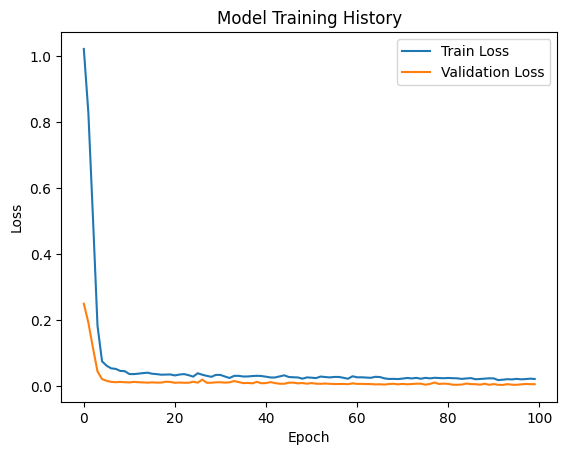

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Predictions for Training Data
y_train_pred_scaled = model.predict(X_train_reshaped)




16/16 [==============================] - 0s 2ms/step


In [ ]:
# Get the index of 'Adj Close' column in the scaled DataFrame
adj_close_index = apple_data_scaled.columns.get_loc('Adj Close')

# Print the index
print(f"The index of 'Adj Close' is: {adj_close_index}")

The index of 'Adj Close' is: 4


In [ ]:
# Creating a dummy array with the same number of features as the original scaled data
dummy_array = np.zeros((y_train_pred_scaled.shape[0], apple_data_scaled.shape[1]))

# Placing the predictions into the first column (assuming 'Close' was the first column)
dummy_array[:, 4] = y_train_pred_scaled.flatten()

# Inverse transforming the dummy array
inverse_transformed_array = scaler.inverse_transform(dummy_array)

# Extracting the predictions
y_train_pred = inverse_transformed_array[:, 4]

In [ ]:
# Predictions for Testing Data
y_test_pred_scaled = model.predict(X_test_reshaped)


8/8 [==============================] - 0s 3ms/step


In [ ]:
# Creating a dummy array with the same number of features as the original scaled data
dummy_array = np.zeros((y_test_pred_scaled.shape[0], apple_data_scaled.shape[1]))

# Placing the predictions into the first column (assuming 'Close' was the first column)
dummy_array[:, 4] = y_test_pred_scaled.flatten()

# Inverse transforming the dummy array
inverse_transformed_array = scaler.inverse_transform(dummy_array)

# Extracting the predictions
y_test_pred = inverse_transformed_array[:, 4]

In [ ]:
# Create a dummy array with the same number of features as the original dataset
dummy_array = np.zeros((y_test_scaled.shape[0], apple_data_scaled.shape[1]))

# Place the scaled y_test values in the appropriate column (assuming 'Close' was the target)
# Adjust the column index as necessary
dummy_array[:, 4] = y_test_scaled

# Inverse transform the dummy array
inverse_transformed_array = scaler.inverse_transform(dummy_array)

# Extract the inverse transformed y_test
y_test_original = inverse_transformed_array[:, 4]

In [ ]:
# Create a dummy array with the same number of features as the original dataset
dummy_array = np.zeros((y_train.shape[0], apple_data_scaled.shape[1]))

# Place the scaled y_test values in the appropriate column (assuming 'Close' was the target)
# Adjust the column index as necessary
dummy_array[:, 4] = y_train

# Inverse transform the dummy array
inverse_transformed_array = scaler.inverse_transform(dummy_array)

# Extract the inverse transformed y_test
y_train_original = inverse_transformed_array[:, 4]

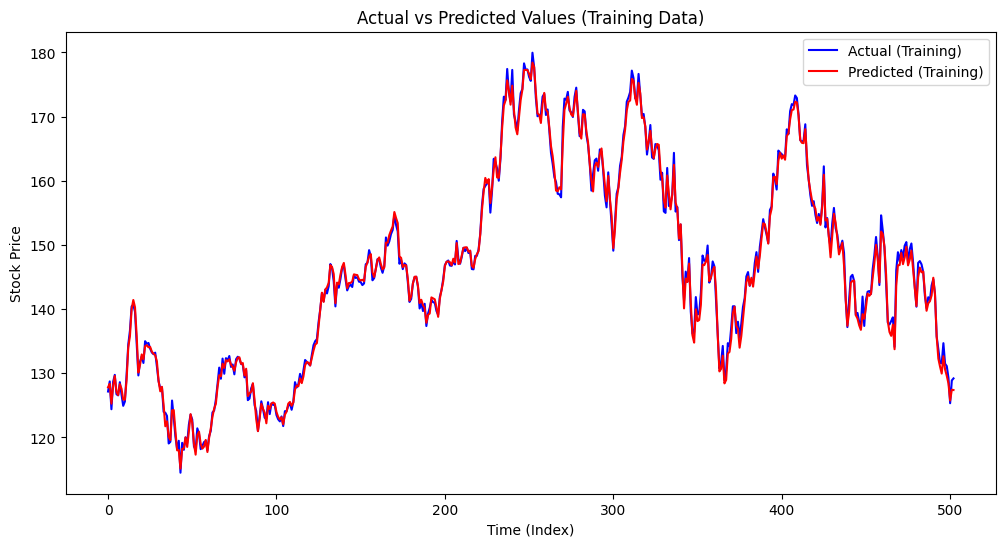

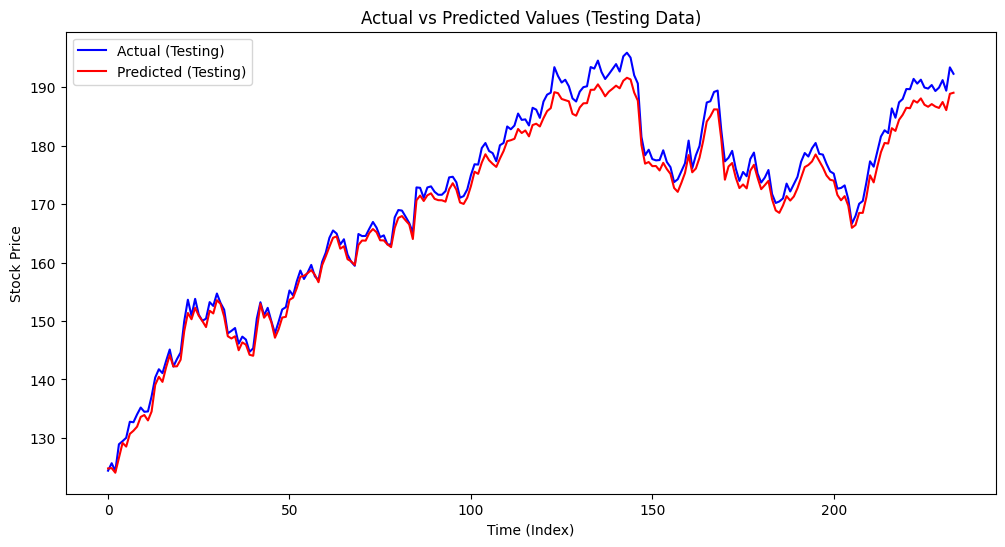

In [ ]:
import matplotlib.pyplot as plt

# Plot for Training Data
plt.figure(figsize=(12, 6))
plt.plot(y_train_original, label='Actual (Training)', color='blue')  # Original y_train values
plt.plot(y_train_pred, label='Predicted (Training)', color='red')  # Predictions for y_train
plt.title('Actual vs Predicted Values (Training Data)')
plt.xlabel('Time (Index)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot for Testing Data
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual (Testing)', color='blue')  # Original y_test values
plt.plot(y_test_pred, label='Predicted (Testing)', color='red')  # Predictions for y_test
plt.title('Actual vs Predicted Values (Testing Data)')
plt.xlabel('Time (Index)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
print('R-squared :', metrics.r2_score(y_test_original, y_test_pred))

R-squared : 0.985661626919553


In [ ]:
# Modeling and results done.

In [ ]:
from textblob import TextBlob

# Example: Calculating sentiment for a single sentence
sentence = "Apple has released a new product that is receiving great reviews."
sentiment_score = TextBlob(sentence).sentiment.polarity

print(f"Sentiment Score: {sentiment_score}")

Sentiment Score: 0.4681818181818182
